<a href="https://colab.research.google.com/github/RiaMalhotra21/CNN-for-Image-Augumentation-and-Robust-Classification/blob/main/CNNs_for_Image_Augmentation_and_Robust_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


In [ ]:

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 49s 0us/step


In [ ]:

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [ ]:

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)

datagen.fit(x_train)


In [ ]:

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])


Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6520 - loss: 1.0150 - val_accuracy: 0.7015 - val_loss: 0.8704
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.6577 - loss: 0.9897 - val_accuracy: 0.6965 - val_loss: 0.8800
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6640 - loss: 0.9667 - val_accuracy: 0.7145 - val_loss: 0.8295
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6665 - loss: 0.9609 - val_accuracy: 0.7004 - val_loss: 0.8590
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6742 - loss: 0.9530 - val_accuracy: 0.7104 - val_loss: 0.8391
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6805 - loss: 0.9359 - val_accuracy: 0.7331 - val_loss: 0.7938
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6777 - loss: 0.9387 - val_accuracy: 0.6913 - val_loss: 0.9071
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6822 -

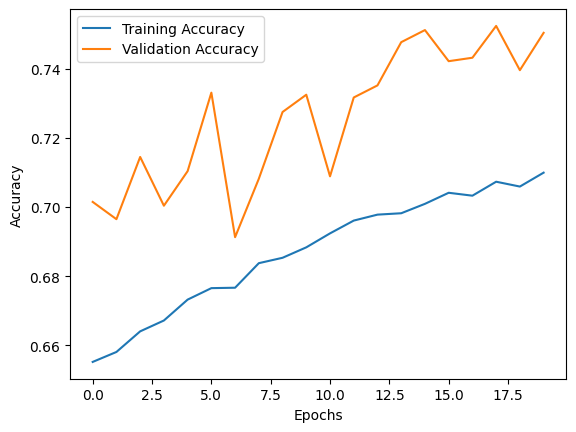

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:

# Evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7530 - loss: 0.7014
Test accuracy: 0.75


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


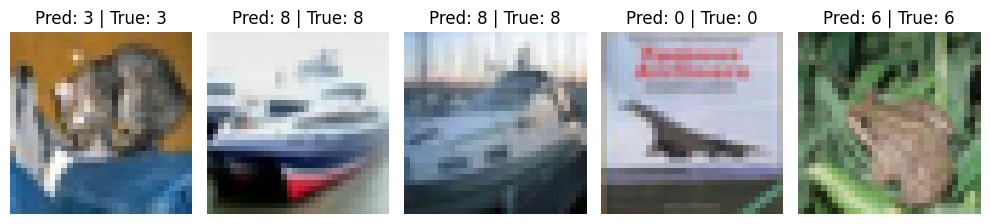

In [ ]:

# Display sample predictions
import numpy as np

sample_images = x_test[:5]
predictions = np.argmax(model.predict(sample_images), axis=1)
actual_labels = np.argmax(y_test[:5], axis=1)

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"Pred: {predictions[i]} | True: {actual_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()